3. Oscilador Armónico (forzado y amortiguado)


$$
 \text{Cuantitativo:} \quad F=m\frac{d^2x}{dt}=F_0 cos(w_d t)-kx- L \frac{dx}{dt} \Rightarrow  \ddot x + C \dot x + Kx = F(t)  %\\ x(t)=A cos(\omega t+\phi)= B cos(\omega t) + C sen(\omega t)\\
$$

$$
 \text{Cualitativo1:} \quad  a_x=\frac{dv_x}{dt} \land \quad v_x=\frac{dx}{dt} \land \quad v_1=Mult(K*x) 
    \land \quad v_2=Mult(C*v_x) \land \quad K=const(K_0)>0 \land \quad \\ C=const(C_0)>0 \land \quad F=MultSum(v_1,v_2,a_x) \land \quad F=Period(t)
$$

$$
\text{Cualitativo2:} \quad x'' + f(x') + g(x) = 0\quad \iff \quad x'' + g(x) = h(x') , \quad \text{where } f,g\in M^+_0 \quad h \in M^-_0
$$

$$
\text{Cualitativo3:} \quad x'' + f(x') = i(x), \quad \text{where } i \in  M^-_0

In [1]:
#import QSIM #imports all submodules
from QSIM import * #imports all functions and classes

# Definir PSR 

In [95]:
#basic landmarks
zero=landmark_value("0",0)
inf=landmark_value("inf",1,is_finite=False)
neg_inf=landmark_value("-inf",-1,is_finite=False)


#time
t0=landmark_value("t0",0)
t_qs=quantity_space("t",[t0,inf])

qv_t0=qualitative_value(t0,Sign(1))
qv_t0_none_sign=qualitative_value(t0,Sign(None))

#x
x0=landmark_value("x0",1)
x_qs=quantity_space("x",[neg_inf,zero,x0,inf])

qv_x0=qualitative_value(x0,Sign(None))


#vx
vx0=landmark_value("vx0",1)
vx_qs=quantity_space("vx",[neg_inf,zero,inf])


#ax
# ax0=landmark_value("ax0",-1)
# qv_ax0=qualitative_value(ax0,Sign(None))
ax_qs=quantity_space("ax",[neg_inf,zero,inf])



#add dt as a variable
one=landmark_value("1",Sign(1))
dt_qs=quantity_space(variable="dt",landmarks_list=[zero,one])
dt_qs.set_maximum_limit(one)
dt_qs.set_minimum_limit(zero)

#gvx
gvx_qs=quantity_space("g(vx)",[neg_inf,zero,inf])

#fx
#f_x0=landmark_value("fx0",Sign(-1))
fx_qs=quantity_space("f(x)",[neg_inf,zero,inf])

#x'' + g(x') = f(x)
#Constraints
dt_x_vx=Derivative(quantity_spaces=[x_qs,vx_qs])
dt_vx_ax=Derivative(quantity_spaces=[vx_qs,ax_qs])

dt_t_dt=Derivative(quantity_spaces=[t_qs,dt_qs])
const_dt_pos=Constant(quantity_spaces=[dt_qs],current_value=one)

minus_vx_gvx=Minus([vx_qs,gvx_qs])
plus_x_fx=Plus([x_qs,fx_qs])

add_ax_fx_gvx=Add([ax_qs,fx_qs,gvx_qs])

#vars,Q, C
all_q_spaces=[t_qs,dt_qs,x_qs,vx_qs,ax_qs,fx_qs,gvx_qs]
V=[qs.variable for qs in all_q_spaces]

Q={}
for qs in all_q_spaces:
    Q[qs.variable]=qs

C=[dt_x_vx,dt_vx_ax,dt_t_dt,const_dt_pos,minus_vx_gvx,plus_x_fx,add_ax_fx_gvx]
   #mult_vx_vx_vx_squared,mplus_vxsq_ke,mplus_x_pe,add_ke_pe_E,const_E]

#Initial State Info
Dbar={'t':qv_t0_none_sign,'x':qv_x0,'vx':qualitative_value(zero,None)} #,'ax':qv_ax0,'f(x)':qualitative_value(f_x0,None),'g(vx)':qualitative_value(zero,None)}
initial_conditions_state=Qualitative_State(Dbar)


Dbar_zero={'t':qv_t0_none_sign,'x':qualitative_value(zero,None),'vx':qualitative_value(zero,None)} #,'ax':qualitative_value(zero,None),'f(x)':qualitative_value(zero,None),'g(vx)':qualitative_value(zero,None)}
initial_conditions_state0=Qualitative_State(Dbar_zero)


#Cfilter(V,Q,C,initial_conditions_state0)

In [3]:
V,Q,C

(['t', 'dt', 'x', 'vx', 'ax', 'f(x)', 'g(vx)'],
 {'t': t: t0 ... inf,
  'dt': dt: 0 ... 1,
  'x': x: -inf ... 0 ... x0 ... inf,
  'vx': vx: -inf ... 0 ... inf,
  'ax': ax: -inf ... 0 ... inf,
  'f(x)': f(x): -inf ... 0 ... inf,
  'g(vx)': g(vx): -inf ... 0 ... inf},
 [⟨ (d/dt x vx)⟩,
  ⟨ (d/dt vx ax)⟩,
  ⟨ (d/dt t dt)⟩,
  ⟨ (const dt)⟩,
  ⟨ (M- vx g(vx))  (⟨inf, dec⟩, ⟨-inf, inc⟩), (⟨inf, inc⟩, ⟨-inf, dec⟩), (⟨-inf, dec⟩, ⟨inf, inc⟩), (⟨0, std⟩, ⟨0, std⟩), (⟨0, dec⟩, ⟨0, inc⟩), (⟨-inf, inc⟩, ⟨inf, dec⟩), (⟨-inf, std⟩, ⟨inf, std⟩), (⟨inf, std⟩, ⟨-inf, std⟩), (⟨0, inc⟩, ⟨0, dec⟩)⟩,
  ⟨ (M+ x f(x))  (⟨-inf, inc⟩, ⟨-inf, inc⟩), (⟨0, std⟩, ⟨0, std⟩), (⟨inf, inc⟩, ⟨inf, inc⟩), (⟨inf, std⟩, ⟨inf, std⟩), (⟨0, dec⟩, ⟨0, dec⟩), (⟨0, inc⟩, ⟨0, inc⟩), (⟨inf, dec⟩, ⟨inf, dec⟩), (⟨-inf, dec⟩, ⟨-inf, dec⟩), (⟨-inf, std⟩, ⟨-inf, std⟩)⟩,
  ⟨ ( ADD ax f(x) g(vx))  (⟨0, inc⟩, ⟨0, dec⟩, ⟨0, std⟩), (⟨0, dec⟩, ⟨0, inc⟩, ⟨0, std⟩), (⟨0, std⟩, ⟨0, inc⟩, ⟨0, inc⟩), (⟨0, inc⟩, ⟨0, inc⟩, ⟨0, inc⟩), (⟨0, std⟩, ⟨0

In [4]:
initial_conditions_state0,initial_conditions_state

({'t': ⟨t0, None⟩, 'x': ⟨0, None⟩, 'vx': ⟨0, None⟩},
 {'t': ⟨t0, None⟩, 'x': ⟨x0, None⟩, 'vx': ⟨0, None⟩})

# Resovler PSR 

In [5]:
from anytree import AsciiStyle, ContRoundStyle, ContStyle, DoubleStyle

#stationary behavior
qv_none_both=qualitative_value(None,None)
Trans_conditions=[False]
stationary_damped_root=QSIM(V,Q,C,Trans_conditions,initial_conditions_state0,time_var="t",cycle_match_criteria="strong",max_breadth=3000,max_depth=10)

0


100%|██████████| 1/1 [00:00<00:00,  4.44it/s]


1


0it [00:00, ?it/s]


2


0it [00:00, ?it/s]


3


0it [00:00, ?it/s]


4


0it [00:00, ?it/s]


5


0it [00:00, ?it/s]


6


0it [00:00, ?it/s]


7


0it [00:00, ?it/s]


8


0it [00:00, ?it/s]


In [6]:
#export tree to .txt for detailed view
with open("Tree_Outputs/03-Oscilador_Armonico_Amortiguado_(Estacionario).txt","w") as f:
    for pre, fill, node in RenderTree(stationary_damped_root): 
        if node.name["cycle_loc"]==None:
            print(str(pre)+str(node.name["loc"])+":"+str({key: node.name["State"].get(key,qv_none_both) for key in V})+" ", file=f) #make sure that dictionary is printed in the order of V
        else:
            print(str(pre)+str(node.name["loc"])+":"+str({key: node.name["State"].get(key,qv_none_both) for key in V})+" -> "+str(node.name["cycle_loc"]), file=f)

In [98]:
#non-stationary behavior
qv_none_both=qualitative_value(None,None)
Trans_conditions=[False]
damped_root=QSIM(V,Q,C,Trans_conditions,initial_conditions_state,time_var="t",cycle_match_criteria="strong",max_breadth=3000,max_depth=11)

0


100%|██████████| 1/1 [00:00<00:00, 33.61it/s]


1


100%|██████████| 1/1 [00:04<00:00,  4.80s/it]


2


100%|██████████| 1/1 [00:00<00:00,  7.43it/s]


3


100%|██████████| 1/1 [00:06<00:00,  6.48s/it]


4


100%|██████████| 3/3 [00:00<00:00, 11.23it/s]


5


100%|██████████| 7/7 [00:42<00:00,  6.06s/it]


6


100%|██████████| 13/13 [00:02<00:00,  5.64it/s]


7


100%|██████████| 27/27 [02:42<00:00,  6.02s/it]


8


100%|██████████| 56/56 [00:05<00:00, 10.92it/s]


9


100%|██████████| 118/118 [11:30<00:00,  5.85s/it]


In [131]:
with open("Tree_Outputs/03-Oscilador_Armonico_Amortiguado.txt","w") as f:
    for pre, fill, node in RenderTree(damped_root,style=ContRoundStyle()): 
        if node.name["cycle_loc"]==None:
            print(str(pre)+str(node.name["loc"])+":"+str({key: node.name["State"].get(key,qv_none_both) for key in V})+" ", file=f) #make sure that dictionary is printed in the order of V
        else:
            print(str(pre)+str(node.name["loc"])+":"+str({key: node.name["State"].get(key,qv_none_both) for key in V})+" -> "+str(node.name["cycle_loc"]), file=f)

In [132]:
from anytree.exporter import DictExporter #, JsonExporter, DotExporter
from anytree.importer import DictImporter
import pickle

exporter = DictExporter()
tree_dict=exporter.export(damped_root)
#exporter = JsonExporter(indent=2, sort_keys=True) #Object of type Derivative is not JSON serializable

with open('oscilador_armonico_amortiguado.pkl', 'wb') as f:
   pickle.dump(tree_dict, f)

# Graficar Soluciones del PSR

In [5]:
from anytree.importer import DictImporter
import pickle

with open('oscilador_armonico_amortiguado.pkl', 'rb') as f:
    loaded_dictionary=pickle.load(f)

#importer=DictImporter()
importer = DictImporter()
damped_root = importer.import_(loaded_dictionary)

In [9]:
import networkx as nx
import hypernetx as hnx

constraint_name_translation_mapping={"Derivative":"Derivada","Constant":"Constante","Add":"Suma","Minus[-]":r"$M^-_0$","Plus[+]":r"$M^+_0$","U[+]":r"$U^+$","U[-]":r"$U^-$"}


def get_constraint_name(c):
    name=str(type(c)).split(".")[1]
    if isinstance(c,M) or isinstance(c,U):
        name+=str(c.type)

    new_name=name.replace("'>","")
    for key in constraint_name_translation_mapping:
        new_name=new_name.replace(key,constraint_name_translation_mapping[key])

    return new_name


def hypergraph_plot_from_C(C):
    data = {i: c.variables for i,c in enumerate(C)}
    labels={i: get_constraint_name(c) for i,c in enumerate(C)}
    H = hnx.Hypergraph(setsystem=data)
    hnx.draw(H,with_edge_counts=True,edge_labels=labels)


class HashableDict(dict):
    def __hash__(self):
        return hash(tuple(sorted(self.items())))

 No module named 'igraph'. If you need to use hypernetx.algorithms.hypergraph_modularity, please install additional packages by running the following command: pip install .['all']


c:\ProgramData\Anaconda3\lib\site-packages\hypernetx\classes\entity.py:1387: RuntimeWarning: The values in the array are unorderable. Pass `sort=False` to suppress this warning.
  properties = props.combine_first(self.properties)
c:\ProgramData\Anaconda3\lib\site-packages\hypernetx\classes\entity.py:1390: RuntimeWarning: The values in the array are unorderable. Pass `sort=False` to suppress this warning.
  properties[self._misc_props_col] = self.properties[
c:\ProgramData\Anaconda3\lib\site-packages\hypernetx\classes\entity.py:1387: RuntimeWarning: The values in the array are unorderable. Pass `sort=False` to suppress this warning.
  properties = props.combine_first(self.properties)
c:\ProgramData\Anaconda3\lib\site-packages\hypernetx\classes\entity.py:1390: RuntimeWarning: The values in the array are unorderable. Pass `sort=False` to suppress this warning.
  properties[self._misc_props_col] = self.properties[


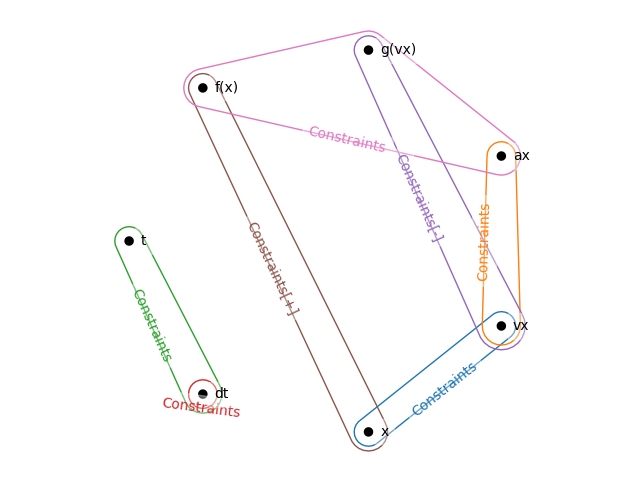

In [10]:
import random
import numpy as np
import matplotlib.pyplot as plt
data = {i: c.variables for i,c in enumerate(C)}
labels={i: get_constraint_name(c) for i,c in enumerate(C)}
H = hnx.Hypergraph(setsystem=data)

#for n in np.linspace(0.1,0.5,10):
# for n in np.arange(35,50,2):
pos=nx.shell_layout(H,nlist=[["t","dt","x","vx","ax","g(vx)","f(x)"]])
#pos={key: pos.get(key,qv_none_both) for key in }
# for n in random.choices(range(1, 101), k=10):
#     print(n)
#     fig, ax = plt.subplots(figsize=(8, 6)) #800x600
#     hnx.draw(H,with_edge_counts=True,with_color=True,edge_labels=labels,ax=ax,pos=pos)
#     plt.show()

fig, ax = plt.subplots(figsize=(8, 6)) #800x600
hnx.draw(H,with_edge_counts=True,with_color=True,edge_labels=labels,ax=ax,pos=pos)#layout_kwargs={'seed': 67,'iterations':50,'k':1})
#plt.savefig('Document Figures/4PSR_osc_amortiguado.png',bbox_inches='tight', pad_inches=0)

# graph x vs t

In [101]:
len(normal_behaviors)

313

In [100]:
stationary_behavior=get_behavior_from_leaf(stationary_damped_root.children[0],key=None)[1:]

normal_behaviors=[]
for leaf in damped_root.leaves:
    normal_behaviors.append(get_behavior_from_leaf(leaf,key=None)[1:])

all_behaviors=[stationary_behavior]+normal_behaviors

In [102]:
def get_qmag_index_from_landmarks(qmag,landmarks_list):

    if isinstance(qmag,landmark_value):
        index=landmarks_list.index(qmag)
    else:
        index_1=landmarks_list.index(qmag[0])
        index_2=landmarks_list.index(qmag[1])
        if (index_2-index_1)==1:
            index=(index_1+index_2)/2 
        elif (index_2-index_1)==2:
            index=1.5*(index_1+index_2)/2 
        else:
            raise ValueError(f"{qmag} indeces don't make sense: {index_1,index_2} in {landmarks_list}")
    return index    

In [103]:
x_var="t"
y_var="x"
time_var="t"

y_qspace_set=set()
for b in all_behaviors:
    behavior_final_landmarks=b[-1].name["Q"][y_var].landmarks
    y_qspace_set=y_qspace_set|{tuple(behavior_final_landmarks)}
    if len(behavior_final_landmarks)==5: #this is possible since all behaviors in "x" can be mapped to [-inf, x1, 0, x0, inf]
        all_y_landmarks=behavior_final_landmarks

unique_behaviors_set=set()
y_behaviors_set=set()
for b in all_behaviors:
    behavior_states_list=[s.name["State"] for s in b]
    x_var_behavior=[s[x_var].qmag for s in behavior_states_list if s[time_var].qmag_type==landmark_value]
    y_var_behavior=[s[y_var].qmag for s in behavior_states_list if s[time_var].qmag_type==landmark_value]
    y_var_derivative_behavior=[s[y_var].qdir for s in behavior_states_list if s[time_var].qmag_type==landmark_value]

    y_behaviors_set=y_behaviors_set|{tuple(y_var_behavior)}
    unique_behaviors_set=unique_behaviors_set|{(tuple(x_var_behavior),tuple(y_var_behavior),tuple(y_var_derivative_behavior))}
    
    #print(y_var_behavior)
#y_behaviors_set
y_qspace_set

{(-inf, 0, x0, inf), (-inf, x1, 0, x0, inf)}

In [104]:
all_x_landmarks=x_var_behavior+[inf] #all t behaviors can be mapped to these landmarks

all_x_landmarks,all_y_landmarks

([t0, t1, t2, t3, t4, t5, inf], [-inf, x1, 0, x0, inf])

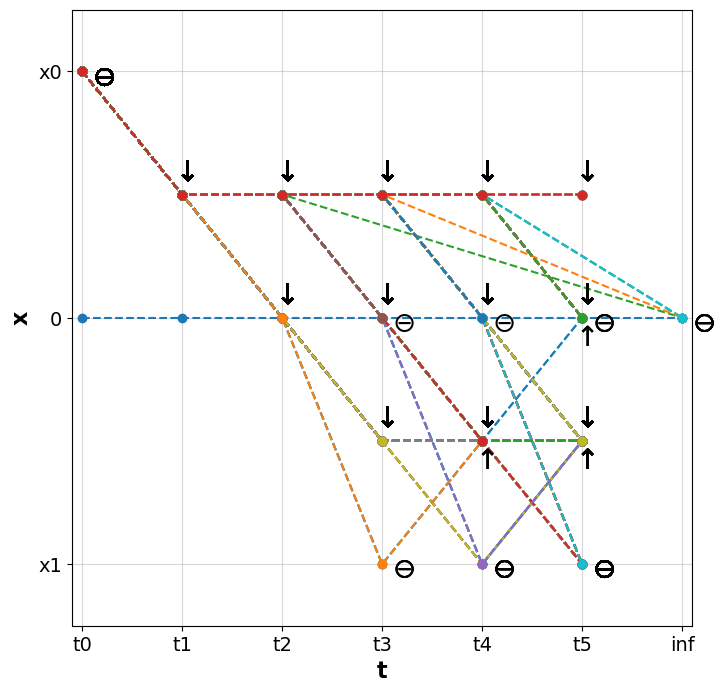

In [106]:
import matplotlib.pyplot as plt
import math

# plt.rcParams['text.usetex'] = True
# plt.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]

#from behavior get final qspace (landmarks), build "master" list of landmarks from all behaviors (if possible), get indeces of elements in master list
time_var="t"
x_var="t"
y_var="x"
delta=0.1

map_qdir_to_symbol={Sign(-1,derivative=True):r"$\downarrow$",Sign(1,derivative=True):r"$\uparrow$", Sign(0,derivative=True): r"$\ominus$"}
map_qdir_to_position={Sign(-1,derivative=True):(0,10),Sign(1,derivative=True):(0,-20),Sign(0,derivative=True): (15,-10)}
#colors = ['black', 'g', 'r','b', 'c', 'm', 'y', 'k', 'w']

# \begin{equation}
# \circ\kern-0.5em{-}\kern-1em{-}
# \end{equation}

grid_shape=(1,1)
plt.figure()
for i,b in enumerate(all_behaviors):
    #print(i)
    behavior_states_list=[s.name["State"] for s in b]
    x_var_behavior=[s[x_var].qmag for s in behavior_states_list if s[time_var].qmag_type==landmark_value] #list of qmags
    y_var_behavior=[s[y_var].qmag for s in behavior_states_list if s[time_var].qmag_type==landmark_value]
    
    y_var_derivative_behavior=[s[y_var].qdir for s in behavior_states_list if s[time_var].qmag_type==landmark_value]
    
    #print(y_var_behavior)

    #final_qs_xvar=b[-1].name["Q"][x_var].landmarks
    #final_yvar_qs_landmarks=b[-1].name["Q"][y_var].landmarks

    if len(y_var_behavior)==1 and len(x_var_behavior)==1:
        x_var_behavior=all_x_landmarks #used only for time, when quiescent state appears
    
    if len(set(y_var_behavior))==1: #constant value
        y_var_behavior=[y_var_behavior[0]]*len(x_var_behavior)
        #final_yvar_qs_landmarks=y_var_behavior
    elif len(set(x_var_behavior))==1: #constant value
        x_var_behavior=[x_var_behavior[0]]*len(y_var_behavior)

    if len(set(y_var_behavior))==1: #constant derivative
        y_var_derivative_behavior=[y_var_derivative_behavior[0]]*len(y_var_behavior)
  
    assert len(y_var_behavior)==len(y_var_derivative_behavior), "mismatched lengths"
    
    #print(i,x_indeces,y_indeces)
    try:
        x_indeces=[get_qmag_index_from_landmarks(qmag,all_x_landmarks) for qmag in x_var_behavior]   
        y_indeces=[get_qmag_index_from_landmarks(qmag,all_y_landmarks) for qmag in y_var_behavior]


        plt.plot(x_indeces, y_indeces, marker='o',linestyle='--',label=str(i)) #,color=colors[i]) #customize the appearance of the dashed lines by providing a dash tuple to the linestyle parameter. 
        #For example, (0, (3, 10, 1, 15)) means (3pt line, 10pt space, 1pt line, 15pt space) with no offset
        
        if i!=0:
            for j,indeces in enumerate(zip(x_indeces,y_indeces)):
                qdir=y_var_derivative_behavior[j]
                label=map_qdir_to_symbol[qdir]
                pos=map_qdir_to_position[qdir]
                plt.annotate(label, (indeces[0],indeces[1]), textcoords="offset points",xytext=pos,ha="center",size=20) #color=colors[i]

    except Exception as e:
        print(e)

plt.xticks(range(len(all_x_landmarks)), all_x_landmarks)
plt.yticks(range(len(all_y_landmarks)), all_y_landmarks)

plt.tick_params(labelsize=14)

plt.xlabel(x_var, fontsize=16, fontweight='bold')
plt.ylabel(y_var, fontsize=16, fontweight='bold')

#delta=0.05 #gives a bit of wiggle room to the figure, avoids overlap with axes
#ceil and floor are included in case of plotting points at qualitative invertals

min_x=min([get_qmag_index_from_landmarks(qmag,all_x_landmarks) for qmag in all_x_landmarks])
max_x=max([get_qmag_index_from_landmarks(qmag,all_x_landmarks) for qmag in all_x_landmarks])
plt.xlim(left=min_x-delta,right=max_x+delta)

min_y=min([get_qmag_index_from_landmarks(qmag,all_y_landmarks) for qmag in all_y_landmarks if qmag.is_finite])
max_y=max([get_qmag_index_from_landmarks(qmag,all_y_landmarks) for qmag in all_y_landmarks if qmag.is_finite])
plt.ylim(bottom=min_y-2.5*delta,top=max_y+2.5*delta)


plt.grid(alpha=0.5)
plt.savefig('../Document Figures/4osc_amortiguado_x_t_behaviors2.png',bbox_inches='tight', pad_inches=0.075)
plt.show()

# Graficar vx vs t

In [125]:
def get_qmag_index_from_landmarks(qmag,landmarks_list):

    if isinstance(qmag,landmark_value):
        index=landmarks_list.index(qmag)
    else:
        index_1=landmarks_list.index(qmag[0])
        index_2=landmarks_list.index(qmag[1])
        if (index_2-index_1)==1:
            index=(index_1+index_2)/2 
        elif (index_2-index_1)==2:
            index=0.5*(index_1+index_2)/2 
        else:
            raise ValueError(f"{qmag} indeces don't make sense: {index_1,index_2} in {landmarks_list}")
    return index    

In [126]:
import random, math
import pandas as pd

grid_shape=(1,1)
time_var="t"
x_var="t"
y_var="vx"
delta=0.2

# y_qspace_set=set()
# for b in all_behaviors:
#     behavior_final_landmarks=b[-1].name["Q"][y_var].landmarks
#     y_qspace_set=y_qspace_set|{tuple(behavior_final_landmarks)}
#     if len(behavior_final_landmarks)==5: #this is possible since all behaviors in "x" can be mapped to [-inf, x1, 0, x0, inf]
#         all_y_landmarks=behavior_final_landmarks

unique_behaviors_set=set()
y_behaviors_set=set()
for b in all_behaviors:
    behavior_states_list=[s.name["State"] for s in b]
    x_var_behavior=[s[x_var].qmag for s in behavior_states_list if s[time_var].qmag_type==landmark_value]
    y_var_behavior=[s[y_var].qmag for s in behavior_states_list if s[time_var].qmag_type==landmark_value]
    y_var_derivative_behavior=[s[y_var].qdir for s in behavior_states_list if s[time_var].qmag_type==landmark_value]

    y_behaviors_set=y_behaviors_set|{tuple(y_var_behavior)}
    unique_behaviors_set=unique_behaviors_set|{(tuple(x_var_behavior),tuple(y_var_behavior),tuple(y_var_derivative_behavior))}
    
    #print(y_var_behavior)
#y_behaviors_set
y_qspace_set #only 3 unique vx qspaces, compatible with (-inf, vx1, 0, vx2, inf)

{(-inf, 0, x0, inf), (-inf, x1, 0, x0, inf)}

In [127]:
x_var_landmarks=[]
y_var_landmarks=[]
for behavior in all_behaviors:
    x_var_landmarks.append(behavior[-1].name["Q"][x_var].landmarks)
    y_var_landmarks.append(behavior[-1].name["Q"][y_var].landmarks)

#all landmarks (this is only valid when all qspaces for a variables are subpaces of a single qspace)
all_x_landmarks=max(set(tuple(x) for x in x_var_landmarks),key=len) #pick longest list out of set of unique lists
all_y_landmarks=max(set(tuple(x) for x in y_var_landmarks),key=len) #pick longest list out of set of unique lists

all_x_landmarks, all_y_landmarks

((t0, t1, t2, t3, t4, t5, inf), (-inf, vx1, 0, vx2, inf))

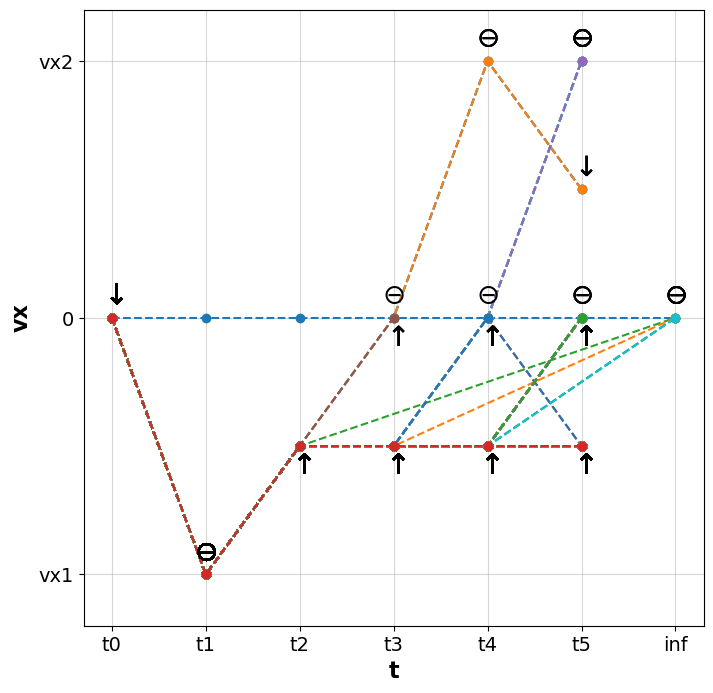

In [130]:
map_qdir_to_symbol={Sign(-1,derivative=True):r"$\downarrow$",Sign(1,derivative=True):r"$\uparrow$", Sign(0,derivative=True): r"$\ominus$"}
map_qdir_to_position={Sign(-1,derivative=True):(0,10),Sign(1,derivative=True):(0,-20),Sign(0,derivative=True): (0,10)}


plt.figure()
for i,behavior in enumerate(all_behaviors):
    #print(i)
    behavior_states_list=[s.name["State"] for s in behavior]#get_behavior_from_leaf(leaf_nodes[0],"State")[1:] #ommit partial initial state

    x_var_behavior=[s[x_var].qmag for s in behavior_states_list if s[time_var].qmag_type==landmark_value]
    y_var_behavior=[s[y_var].qmag for s in behavior_states_list if s[time_var].qmag_type==landmark_value]
    y_var_derivative_behavior=[s[y_var].qdir for s in behavior_states_list if s[time_var].qmag_type==landmark_value]

    if len(y_var_behavior)==1 and len(x_var_behavior)==1:
        x_var_behavior=all_x_landmarks #used only for time, when quiescent state appears
    
    if len(set(y_var_behavior))==1: #constant value
        y_var_behavior=[y_var_behavior[0]]*len(x_var_behavior)
    elif len(set(x_var_behavior))==1: #constant value
        x_var_behavior=[x_var_behavior[0]]*len(y_var_behavior)

    x_indeces=[get_qmag_index_from_landmarks(qmag,all_x_landmarks) for qmag in x_var_behavior]   
    y_indeces=[get_qmag_index_from_landmarks(qmag,all_y_landmarks) for qmag in y_var_behavior]

    #x_indeces=[(all_x_landmarks.index(el[0])+all_x_landmarks.index(el[1]))/2 if type(el)==tuple else all_x_landmarks.index(el) for el in x_var_behavior]
    #print(y_var_behavior,all_y_landmarks)
    #y_indeces=[(all_y_landmarks.index(el[0])+all_x_landmarks.index(el[1]))/2 if type(el)==tuple else all_y_landmarks.index(el) for el in y_var_behavior]
    try:
        if i!=0:
            for j,indeces in enumerate(zip(x_indeces,y_indeces)):
                qdir=y_var_derivative_behavior[j]
                label=map_qdir_to_symbol[qdir]
                pos=map_qdir_to_position[qdir]
                plt.annotate(label, (indeces[0],indeces[1]), textcoords="offset points",xytext=pos,ha="center",size=20) #color=colors[i]

    except Exception as e:
        print(e)


    plt.plot(x_indeces, y_indeces, marker='o',linestyle='--',label=str(i)) #customize the appearance of the dashed lines by providing a dash tuple to the linestyle parameter. 
    #For example, (0, (3, 10, 1, 15)) means (3pt line, 10pt space, 1pt line, 15pt space) with no offset

plt.xticks(range(len(all_x_landmarks)), all_x_landmarks)
plt.yticks(range(len(all_y_landmarks)), all_y_landmarks)

plt.tick_params(labelsize=14)
# for tick in ax.xaxis.get_major_ticks():
#     tick.label.set_fontsize(16)
# for tick in ax.yaxis.get_major_ticks():
#     tick.label.set_fontsize(16)

plt.xlabel(x_var, fontsize=16, fontweight='bold')
plt.ylabel(y_var, fontsize=16, fontweight='bold')

#delta=0.05 #gives a bit of wiggle room to the figure, avoids overlap with axes
#ceil and floor are included in case of plotting points at qualitative invertals


if y_var=="x":
    plt.ylim(bottom=math.floor(min(y_indeces)-1)-delta,top=math.ceil(max(y_indeces))+delta)
elif y_var=="vx":
    #plt.xlim(left=math.floor(min(x_indeces))-delta,right=math.ceil(max(x_indeces))+delta)
    plt.ylim(bottom=math.floor(min(y_indeces))-delta,top=math.ceil(max(y_indeces)+1)+delta)

# ax.set_xlim(left=math.floor(min(x_indeces))-delta,right=math.ceil(max(x_indeces))+delta)
# ax.set_ylim(bottom=math.floor(min(y_indeces))-delta,top=math.ceil(max(y_indeces))+delta)

plt.grid(alpha=0.5)
#plt.legend()

plt.savefig('../Document Figures/4osc_amortiguado_vx_t_behaviors2.png',bbox_inches='tight', pad_inches=0.075)
plt.show()

# Envisionment (transition graph)

In [ ]:
#Cycles: (7,19), (6,7), (5,5), (4,2) and (7,25), (6,12), (5,6), (4,2)

In [47]:
#cycle_states_loc_list=[(7,19), (6,7), (5,5), (4,2),(7,25), (6,12), (5,6)]
# cycle_leaf_states_loc_list=data_df[~data_df["cycle_loc"].isna()]["loc"].drop_duplicates().to_list() #[(7,19),(7,25)]
# aux_df=data_df[data_df["loc"].isin(cycle_leaf_states_loc_list)].copy()

# aux_df["State"]=aux_df["State"].apply(lambda x: HashableDict(x))
# aux_df["Q"]=aux_df["Q"].apply(lambda x: HashableDict(x))
# aux_df.drop_duplicates(subset=["State","Q"])

In [80]:
#data_df.dropna(subset=["cycle_loc"])[["loc","cycle_loc"]].drop_duplicates()

,loc,cycle_loc
315,"(7, 19)","(4, 2)"
463,"(7, 25)","(4, 2)"


In [ ]:
# for index, row in data_df.dropna(subset=["cycle_loc"])[["loc","cycle_loc"]].drop_duplicates().iterrows():
#     loc1,loc2=row["loc"],row["cycle_loc"]
#     #print(loc1,loc2)
#     #print(data_df[data_df["loc"]==loc1]["loc"])
#     state1=data_df[data_df["loc"]==loc1]["State"].iloc[-1]
#     state2=data_df[data_df["loc"]==loc2]["State"].iloc[-1]


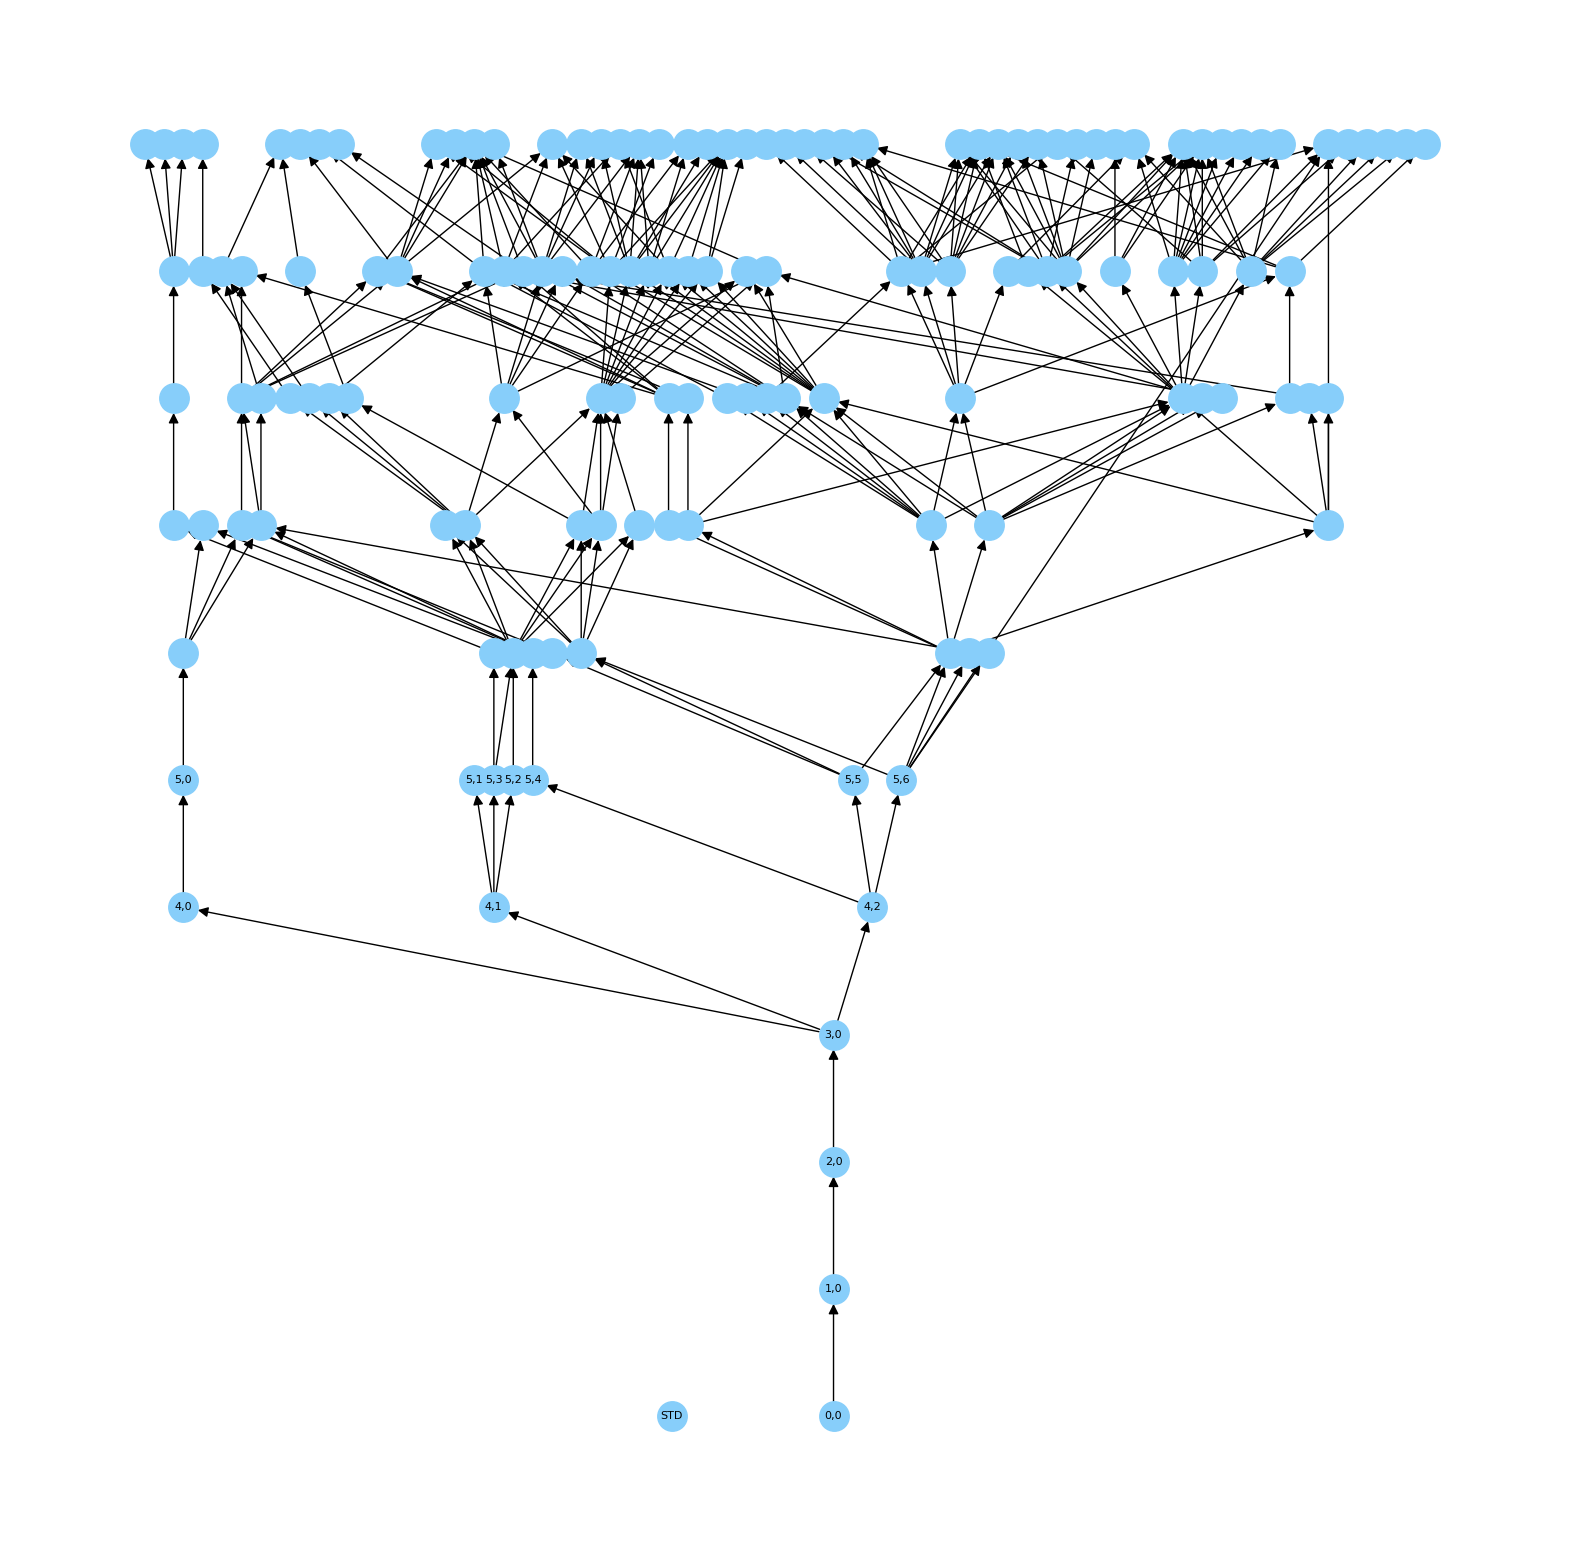

In [148]:
import networkx as nx
import pandas as pd

from grandalf.graphs import Vertex,Edge,Graph,graph_core
from grandalf.layouts import SugiyamaLayout

time_var="t"
G = nx.DiGraph()

class HashableDict(dict):
    def __hash__(self):
        return hash(tuple(sorted(self.items())))

data=[]
behavior_edges=[]
edge_colors={}

for i,behavior in enumerate(all_behaviors):
    for j,s in enumerate(behavior):
        state=HashableDict({key: s.name["State"].get(key,qv_none_both) for key in V}) #set(V)-{time_var}
        q=s.name["Q"]
        loc=s.name["loc"]
        cycle_loc=s.name["cycle_loc"]
        data.append([i,state,q,loc,cycle_loc])
        
        if j>0:
            state1=data[-2][1]
            state2=state
            behavior_edges.append([state1,state2])
            edge_colors[(state1,state2)]="black"

data_df=pd.DataFrame(data,columns=["Behavior_No","State","Q","loc","cycle_loc"])


behavior_nodes=data_df.drop_duplicates(subset=["State"])["State"].to_list()
#add cycle edges
# for index, row in data_df.dropna(subset=["cycle_loc"])[["loc","cycle_loc"]].drop_duplicates().iterrows():
#     loc1,loc2=row["loc"],row["cycle_loc"]
#     # print(loc1,loc2)
#     # print(data_df[data_df["loc"]==loc1]["loc"])
#     state1=data_df[data_df["loc"]==loc1]["State"].iloc[-1]
#     state2=data_df[data_df["loc"]==loc2]["State"].iloc[-1]
#     behavior_edges.append([state1,state2])
#     edge_colors[(state1,state2)]="black"

G.add_nodes_from(behavior_nodes)
G.add_edges_from(behavior_edges)

#pos=nx.spectral_layout(G)
#pos=nx.shell_layout(G) #x
#pos=nx.random_layout(G)
#pos=nx.circular_layout(G) #x
#pos=nx.kamada_kawai_layout(G,) #x
#pos=nx.planar_layout(G) #x
#pos=nx.spring_layout(G,pos=pos,iterations=2)

#use grandalf's Sugiyama algorithm to compute positions
V_dict = {node: Vertex(node) for node in G.nodes()}
gr_vertices = list(V_dict.values())
gr_edges = [Edge(V_dict[edge[0]], V_dict[edge[1]]) for edge in G.edges()]
G_grandalf = Graph(gr_vertices, gr_edges)


class defaultview(object):
    w,h = 10,10
for v in gr_vertices: 
    v.view = defaultview()

sug = SugiyamaLayout(G_grandalf.C[-1])
sug.init_all()#(roots=[gr_vertices[1]],inverted_edges=[gr_vertices[4].e_to(gr_vertices[0])])
sug.draw()

pos={}
for v in G_grandalf.C[-1].sV:
    #print("%s: (%d,%d)"%(v.data,v.view.xy[0],v.view.xy[1]))
    pos[v.data]=np.array([v.view.xy[0],v.view.xy[1]])



labels = {}
for i,node in enumerate(G.nodes()):
    raw_label=data_df[data_df["State"]==node]["loc"].iloc[0]
    if raw_label[0]<6:
        labels[node] = str(raw_label).replace("(","").replace(")","").replace(" ","")
    

#change info for stationary behavior
stationary_state=HashableDict(stationary_behavior[0].name["State"])
pos[stationary_state]=np.array([-250,5])
labels[stationary_state]="STD"

plt.figure(figsize=(20,20))
ax=plt.subplot()

# # Draw the graph in the first subplot
nx.draw_networkx(G, with_labels=True,arrows=True,pos=pos,node_size=450,arrowsize=15,edge_color=edge_colors.values(),node_color="lightskyblue",labels=labels,font_size=8,ax=ax) #labels
plt.box(False)
plt.savefig('../Document Figures/4osc_amortiguado_envisionment2.png',bbox_inches='tight', pad_inches=0.075)
plt.show()

({'t': ⟨t0, inc⟩,
  'dt': ⟨1, std⟩,
  'x': ⟨x0, std⟩,
  'vx': ⟨0, dec⟩,
  'ax': ⟨(-inf, 0), inc⟩,
  'f(x)': ⟨f(x)0, std⟩,
  'g(vx)': ⟨0, inc⟩},
 {'t': ⟨(t0, inf), inc⟩,
  'dt': ⟨1, std⟩,
  'x': ⟨(0, x0), dec⟩,
  'vx': ⟨(-inf, 0), dec⟩,
  'ax': ⟨(-inf, 0), inc⟩,
  'f(x)': ⟨(0, f(x)0), dec⟩,
  'g(vx)': ⟨(0, inf), inc⟩})

In [142]:
nx.get_edge_attributes(G,'color')

{}

: 

In [141]:
data_df

,Behavior_No,State,Q,loc,cycle_loc
0,0,"{'t': ⟨t0, inc⟩, 'dt': ⟨1, std⟩, 'x': ⟨0, std⟩...","{'t': t: t0 ... inf, 'dt': dt: 0 ... 1, 'x': x...","(0, 0)",None
1,1,"{'t': ⟨t0, inc⟩, 'dt': ⟨1, std⟩, 'x': ⟨x0, std...","{'t': t: t0 ... inf, 'dt': dt: 0 ... 1, 'x': x...","(0, 0)",None
2,1,"{'t': ⟨(t0, inf), inc⟩, 'dt': ⟨1, std⟩, 'x': ⟨...","{'t': t: t0 ... inf, 'dt': dt: 0 ... 1, 'x': x...","(1, 0)",None
3,1,"{'t': ⟨t1, inc⟩, 'dt': ⟨1, std⟩, 'x': ⟨(0, x0)...","{'t': t: t0 ... t1 ... inf, 'dt': dt: 0 ... 1,...","(2, 0)",None
4,1,"{'t': ⟨(t1, inf), inc⟩, 'dt': ⟨1, std⟩, 'x': ⟨...","{'t': t: t0 ... t1 ... inf, 'dt': dt: 0 ... 1,...","(3, 0)",None
...,...,...,...,...,...
550,63,"{'t': ⟨t2, inc⟩, 'dt': ⟨1, std⟩, 'x': ⟨(0, x0)...","{'t': t: t0 ... t1 ... t2 ... inf, 'dt': dt: 0...","(4, 2)",None
551,63,"{'t': ⟨(t2, inf), inc⟩, 'dt': ⟨1, std⟩, 'x': ⟨...","{'t': t: t0 ... t1 ... t2 ... inf, 'dt': dt: 0...","(5, 6)",None
552,63,"{'t': ⟨t3, inc⟩, 'dt': ⟨1, std⟩, 'x': ⟨(0, x0)...","{'t': t: t0 ... t1 ... t2 ... t3 ... inf, 'dt'...","(6, 12)",None
553,63,"{'t': ⟨(t3, inf), inc⟩, 'dt': ⟨1, std⟩, 'x': ⟨...","{'t': t: t0 ... t1 ... t2 ... t3 ... inf, 'dt'...","(7, 26)",None


In [ ]:
import networkx as nx

G = nx.Graph()
G.add_edge(1,2,color='r',weight=2)
G.add_edge(2,3,color='b',weight=4)
G.add_edge(3,4,color='g',weight=6)

pos = nx.circular_layout(G)

edges = G.edges()
colors = [G[u][v]['color'] for u,v in edges]
weights = [G[u][v]['weight'] for u,v in edges]

nx.draw(G, pos, edges=edges, edge_color=colors, width=weights)
